In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [ ]:
turbine = pd.read_csv('Documents/anaiise com python/T1.csv')


In [9]:
turbine.columns =["Data/Hora", "Potencia(KW)", "Velocidade do Vento(m/s)", "Curva Teorica(KWh)", "Direcao vento"]
del turbine['Direcao vento']
display(turbine)

,Data/Hora,Potencia(KW),Velocidade do Vento(m/s),Curva Teorica(KWh)
0,01 01 2018 00:00,380.047791,5.311336,416.328908
1,01 01 2018 00:10,453.769196,5.672167,519.917511
2,01 01 2018 00:20,306.376587,5.216037,390.900016
3,01 01 2018 00:30,419.645905,5.659674,516.127569
4,01 01 2018 00:40,380.650696,5.577941,491.702972
...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503


In [10]:
turbine['Data/Hora'] = pd.to_datetime(turbine['Data/Hora'])

In [11]:
display(turbine)

,Data/Hora,Potencia(KW),Velocidade do Vento(m/s),Curva Teorica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


<AxesSubplot:xlabel='Velocidade do Vento(m/s)', ylabel='Potencia(KW)'>

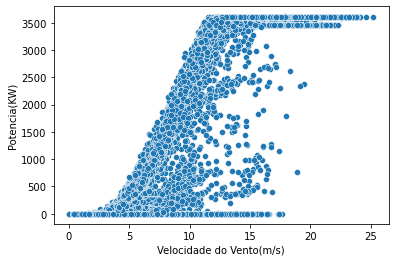

In [13]:
sns.scatterplot(data=turbine, x = 'Velocidade do Vento(m/s)', y='Potencia(KW)' )

<AxesSubplot:xlabel='Velocidade do Vento(m/s)', ylabel='Curva Teorica(KWh)'>

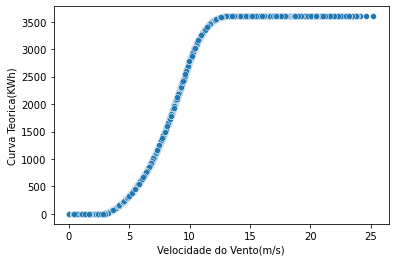

In [14]:
sns.scatterplot(data=turbine, x = 'Velocidade do Vento(m/s)', y='Curva Teorica(KWh)' )

In [15]:
pot_real = turbine['Potencia(KW)'].tolist()
pot_teorica = turbine['Curva Teorica(KWh)'].tolist()

In [18]:
pot_max = []
pot_min = []
limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)
    
for p, potencia in enumerate(pot_real):
    if potencia>= pot_min[p] and potencia <=pot_max[p]:
        limite.append('Dentro')
    elif potencia == 0:
        limite.append('Zero')
    else:
        limite.append('Fora')
        
turbine['DentroLimite'] = limite

display(turbine)
    

,Data/Hora,Potencia(KW),Velocidade do Vento(m/s),Curva Teorica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


<AxesSubplot:xlabel='Velocidade do Vento(m/s)', ylabel='Potencia(KW)'>

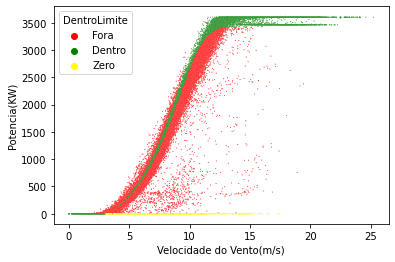

In [24]:
cores = {'Dentro': 'green', 'Fora': 'red', 'Zero':'yellow'}
sns.scatterplot(data=turbine, x = 'Velocidade do Vento(m/s)', y='Potencia(KW)', hue='DentroLimite', s=1, palette=cores )